# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.013484,0.070348,0.092844,0.178041,0.995143,0.971825
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004219,0.104900,0.050685,0.206709,0.998480,0.957986
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.024257,0.026315,0.124436,0.129827,0.991262,0.989461
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.023729,0.026054,0.122593,0.129142,0.991452,0.989565
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.021629,0.027609,0.117255,0.132802,0.992209,0.988942


## Feature Effect Results

In [5]:
feauture_effect_type = "pdp_results"

In [6]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.180426,0.401558,5.811762e-03,1.675942e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.187062,0.676252,7.614002e-03,1.474663e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.002637,0.001546,3.312238e-04,1.123450e-04
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.002223,0.002174,1.766624e-08,1.766624e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001291,0.002843,1.382361e-03,3.447765e-03


## Correlation Analysis

In [7]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.013484,0.070348,0.092844,0.178041,0.995143,0.971825,x_1,0.180426
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004219,0.104900,0.050685,0.206709,0.998480,0.957986,x_1,0.187062
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.024257,0.026315,0.124436,0.129827,0.991262,0.989461,x_1,0.002637
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.023729,0.026054,0.122593,0.129142,0.991452,0.989565,x_1,0.002223
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.021629,0.027609,0.117255,0.132802,0.992209,0.988942,x_1,0.001291


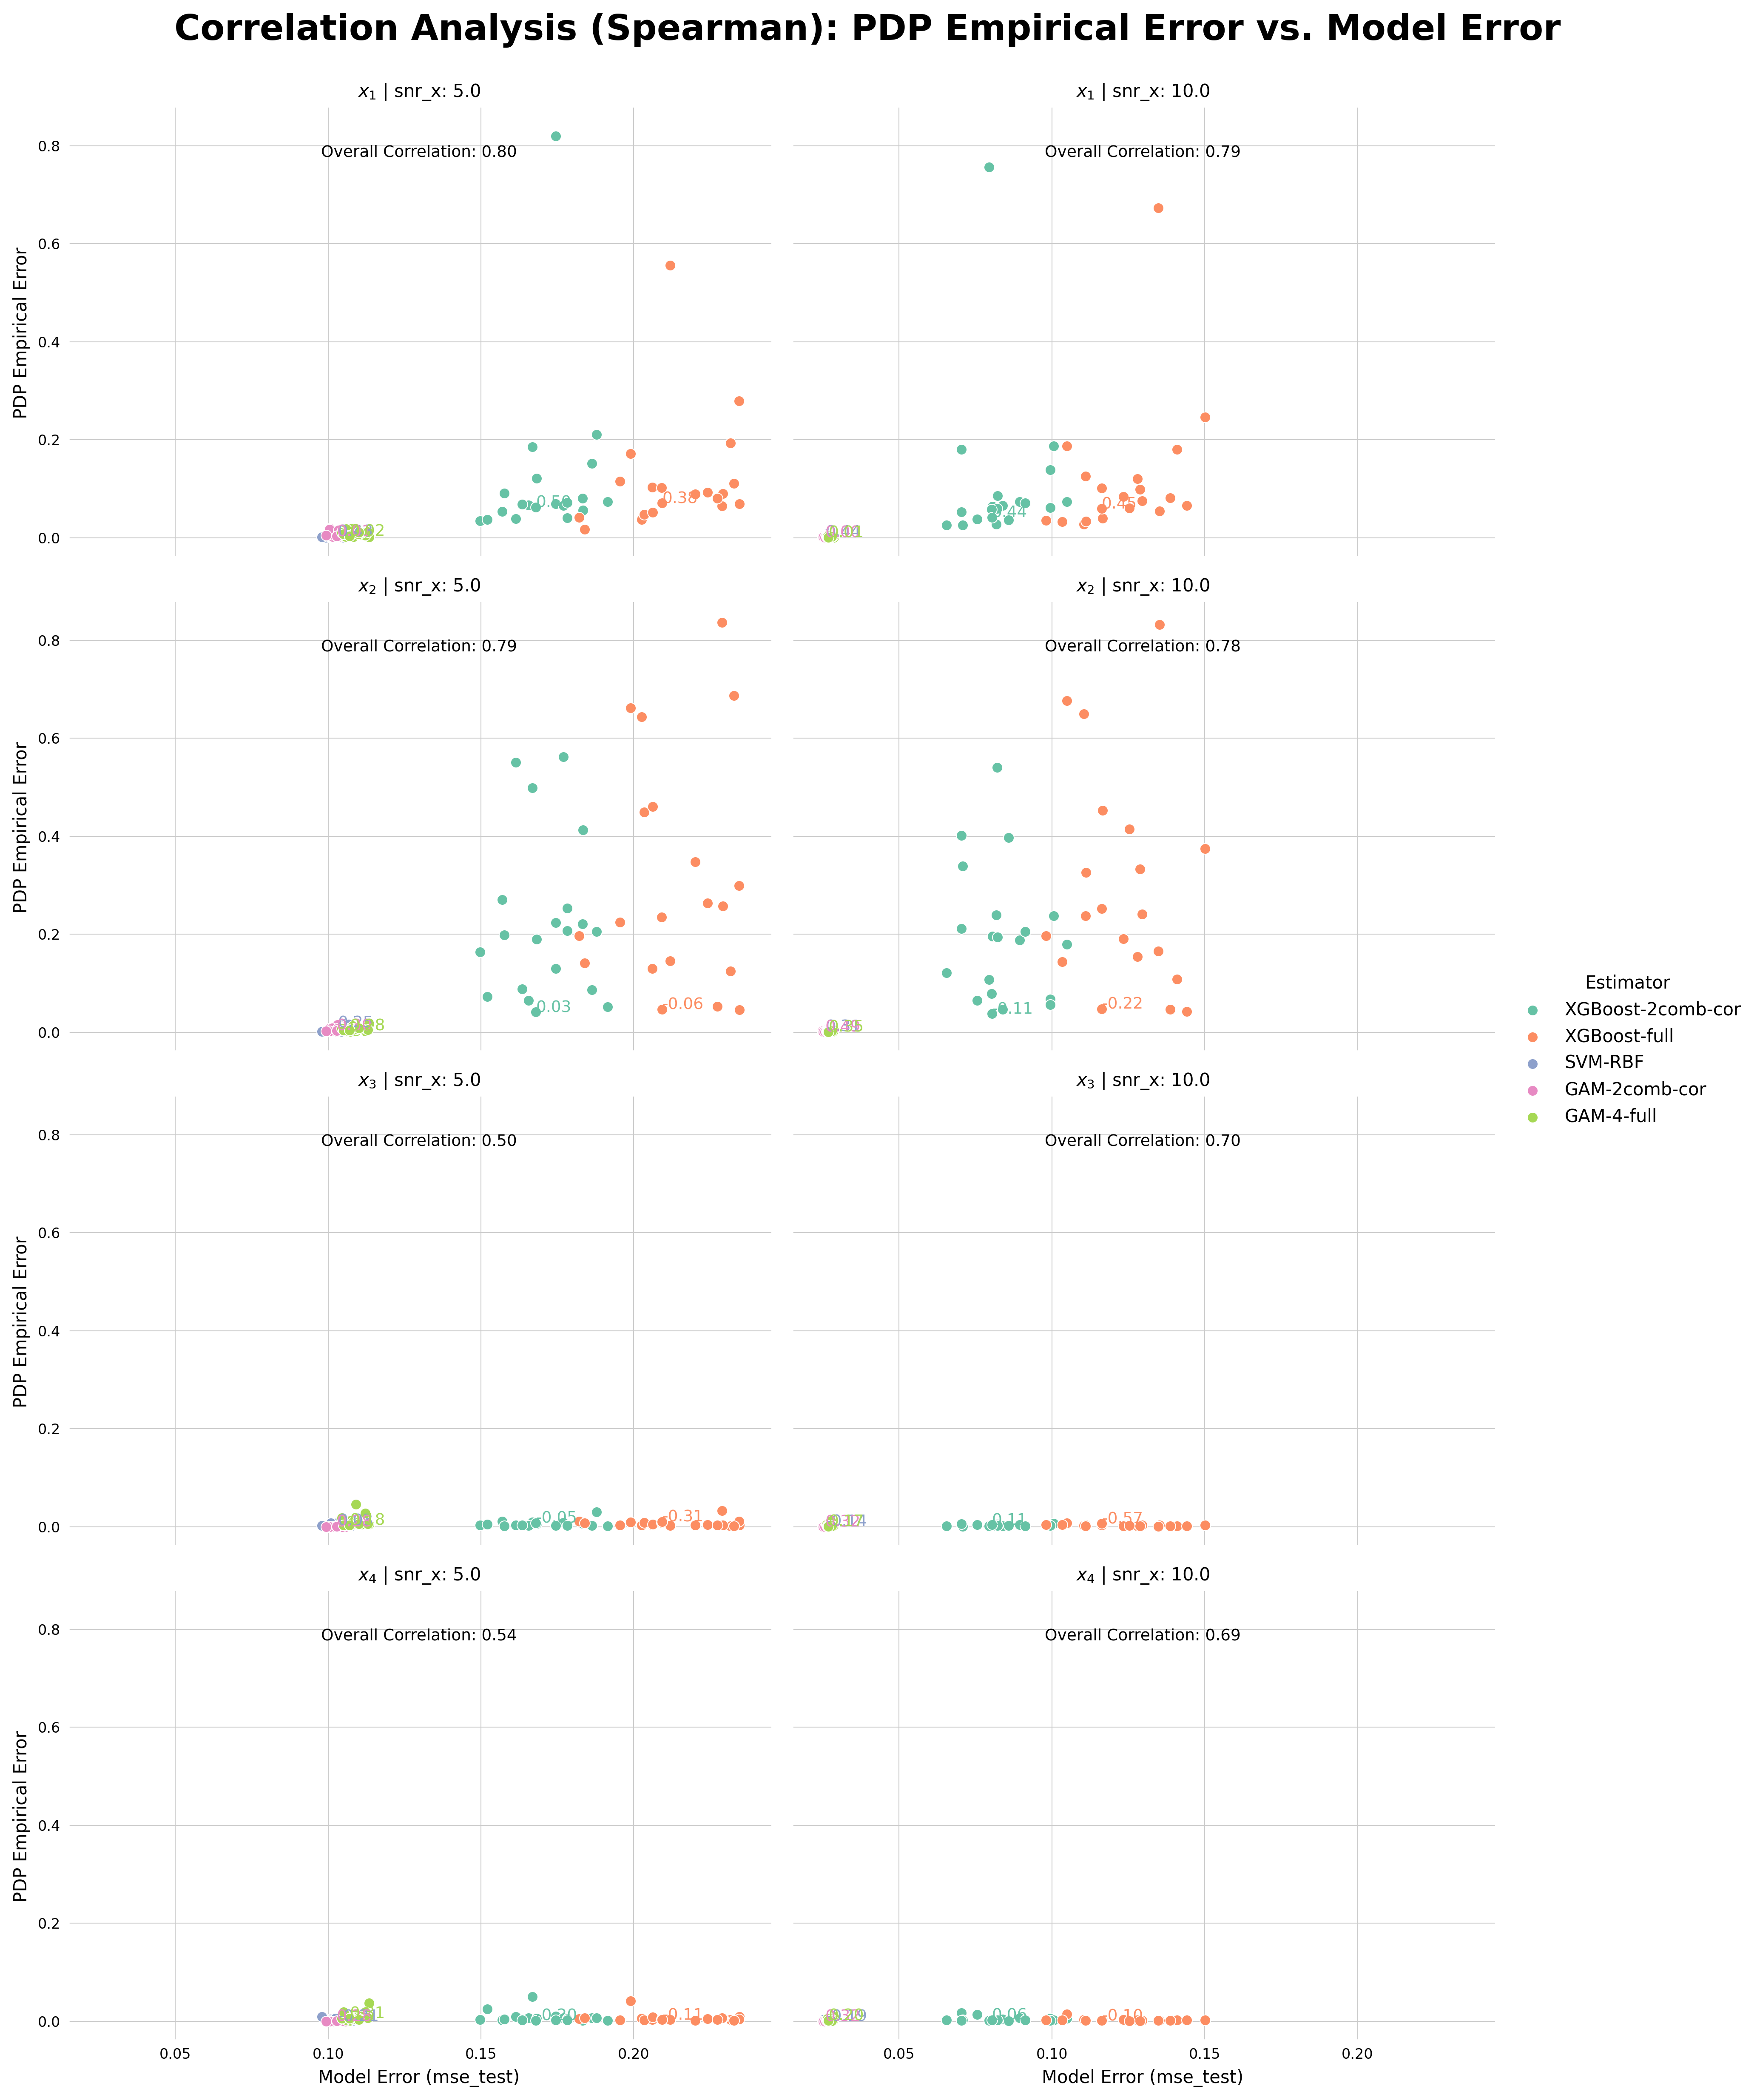

In [8]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [9]:
g;

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.802952
             XGBoost-2comb-cor     0.502256
             XGBoost-full          0.375940
             SVM-RBF               0.428571
             GAM-2comb-cor         0.009023
             GAM-4-full            0.024060
        10.0 Overall               0.791071
             XGBoost-2comb-cor     0.440602
             XGBoost-full          0.454135
             SVM-RBF               0.440602
             GAM-2comb-cor         0.001504
             GAM-4-full            0.009023
x_2     5.0  Overall               0.787375
             XGBoost-2comb-cor     0.027068
             XGBoost-full         -0.063158
             SVM-RBF               0.254135
             GAM-2comb-cor         0.303759
             GAM-4-full            0.278195
        10.0 Overall               0.782022
             XGBoost-2comb-cor    -0.108271
             XGBoost-full         -0.218045
             SVM-RBF               0.308271
             GAM-2comb-cor         0.485714
             GAM-4-full            0.353383
x_3     5.0  Overall               0.501818
             XGBoost-2comb-cor    -0.049624
             XGBoost-full         -0.311278
             SVM-RBF               0.033083
             GAM-2comb-cor         0.282707
             GAM-4-full            0.178947
        10.0 Overall               0.697930
             XGBoost-2comb-cor     0.105263
             XGBoost-full         -0.568421
             SVM-RBF              -0.144361
             GAM-2comb-cor         0.320301
             GAM-4-full            0.169925
x_4     5.0  Overall               0.539994
             XGBoost-2comb-cor    -0.195489
             XGBoost-full         -0.109774
             SVM-RBF              -0.210526
             GAM-2comb-cor         0.282707
             GAM-4-full            0.306767
        10.0 Overall               0.688833
             XGBoost-2comb-cor     0.060150
             XGBoost-full         -0.096241
             SVM-RBF              -0.192481
             GAM-2comb-cor         0.320301
             GAM-4-full            0.201504

## Feature Effect Results

In [11]:
feauture_effect_type = "ale_results"

In [12]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.033380,0.084909,0.001532,0.002032
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.036309,0.118004,0.004219,0.004801
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000395,0.000405,0.000079,0.000026
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.000279,0.000284,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000159,0.000517,0.000418,0.000812


## Correlation Analysis

In [13]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.013484,0.070348,0.092844,0.178041,0.995143,0.971825,x_1,0.033380
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004219,0.104900,0.050685,0.206709,0.998480,0.957986,x_1,0.036309
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.024257,0.026315,0.124436,0.129827,0.991262,0.989461,x_1,0.000395
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.023729,0.026054,0.122593,0.129142,0.991452,0.989565,x_1,0.000279
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.021629,0.027609,0.117255,0.132802,0.992209,0.988942,x_1,0.000159


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


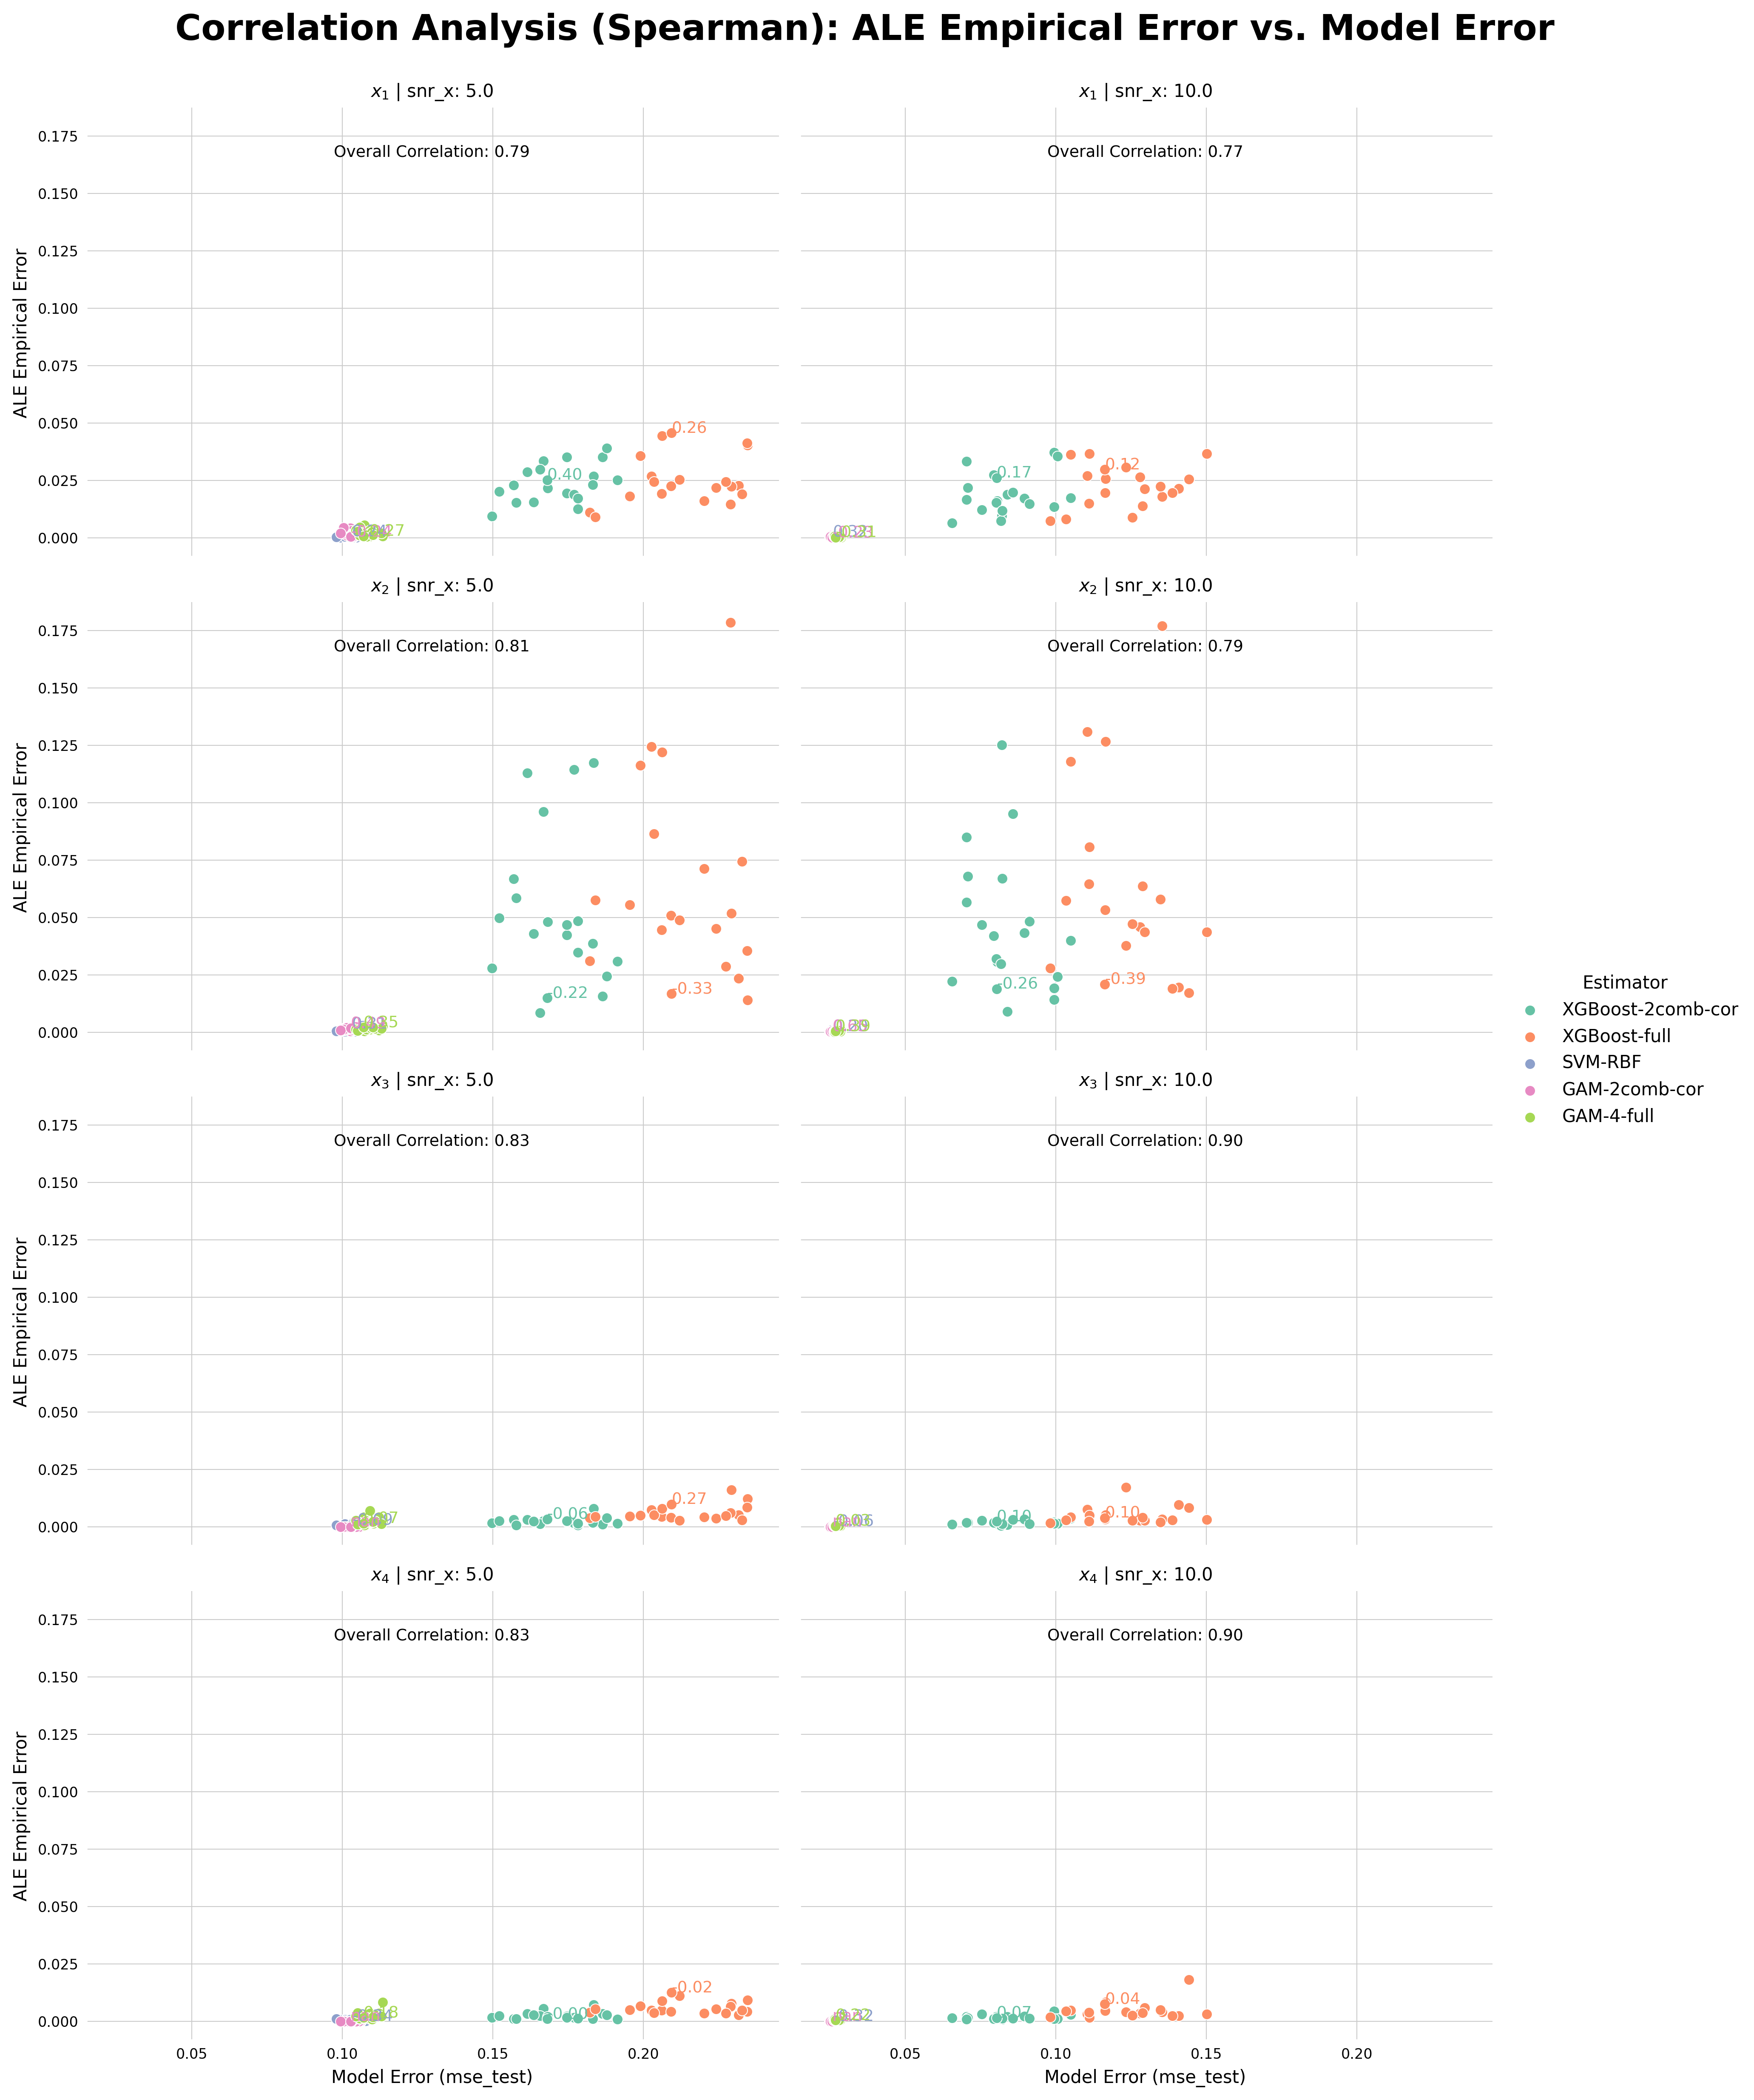

In [14]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [15]:
g;

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.791431
             XGBoost-2comb-cor     0.395489
             XGBoost-full          0.255639
             SVM-RBF               0.243609
             GAM-2comb-cor        -0.240602
             GAM-4-full           -0.270677
        10.0 Overall               0.770285
             XGBoost-2comb-cor     0.171429
             XGBoost-full          0.117293
             SVM-RBF               0.324812
             GAM-2comb-cor        -0.225564
             GAM-4-full           -0.309774
x_2     5.0  Overall               0.806613
             XGBoost-2comb-cor    -0.216541
             XGBoost-full         -0.327820
             SVM-RBF               0.311278
             GAM-2comb-cor         0.493233
             GAM-4-full            0.347368
        10.0 Overall               0.794479
             XGBoost-2comb-cor    -0.260150
             XGBoost-full         -0.390977
             SVM-RBF               0.203008
             GAM-2comb-cor         0.645113
             GAM-4-full            0.390977
x_3     5.0  Overall               0.826262
             XGBoost-2comb-cor    -0.064662
             XGBoost-full          0.272180
             SVM-RBF              -0.093233
             GAM-2comb-cor              NaN
             GAM-4-full            0.070677
        10.0 Overall               0.898757
             XGBoost-2comb-cor     0.103759
             XGBoost-full          0.102256
             SVM-RBF              -0.057143
             GAM-2comb-cor              NaN
             GAM-4-full            0.034586
x_4     5.0  Overall               0.830720
             XGBoost-2comb-cor    -0.001504
             XGBoost-full         -0.019549
             SVM-RBF              -0.335338
             GAM-2comb-cor              NaN
             GAM-4-full            0.178947
        10.0 Overall               0.901781
             XGBoost-2comb-cor     0.067669
             XGBoost-full          0.037594
             SVM-RBF              -0.324812
             GAM-2comb-cor              NaN
             GAM-4-full            0.218045